# Coursework A - Observation Planning, Data Analysis & Photometry

This coursework should take you <b>approximately 1-2h to complete (after completing the Chapter 1\& 2 Notebooks)</b> and is worth <b>20% of your grade for this unit</b>. Ensure that any calculations run correctly, i.e. make sure there are no typos in any Python code you include. Check this by running all cells before submission. Watch the short video that explains how to use this notebook.

For answering the questions, you will be provided with images just like the ones in Chapter2_AperturePhotometry. These are simulated specifically for you given your Student ID. You can use the functions .get_data, .plot_x, .plot_y and .show_ima to interrogate the data. The functions that allow you to check your answer are however disabled. 

Answer all questions in the boxes provided.

You can add additional cells to import any functions you wrote for other notebooks.

<div class="alert alert-block alert-danger">

Add your <b>Candidate Number (5 digits)</b> below and <b>run the cell</b>:

<b>IMPORTANT: DO NOT CHANGE WHILE WORKING ON YOUR COURSEWORK, IT IS USED TO CREATE A RANDOM DATASET BASED ON YOUR ID!</b>

If you are using your own module, upload this when submitting your coursework.

In [279]:
studentid = 24528

In [280]:
%load_ext autoreload
from image_simulator import ImageSimulator
import LightCurveSimulator
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Section 1 : Observations

## Question 1

Below is the lightcurve of a Kepler Planet transiting, assume that the star has the same radius as the sun. Given the signal to noise in the lightcurve, estimate the size of the smallest detectable planet? Describe how you derived your answer.

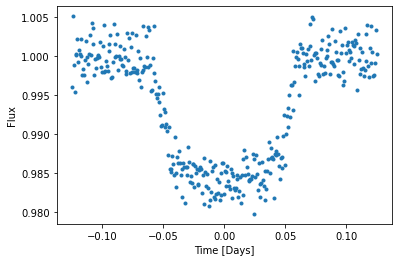

In [281]:
lc = LightCurveSimulator.ShortTransit()
lc.add_noise(sn=500)
lc.plotlc()

## Answer 1

In [282]:
import numpy as np

In [283]:
#radius of the sun
r_sun = 6.957e8
#radius of planet
rad = np.sqrt(0.0175)*r_sun

#divide by 1000 to convert to km
print(rad/1000) 

92032.45935538178


Observation of the lightcurve shows only one obvious 'dip' in the flux of the host star so analysis of the curve provides the size of the smallest and only detectable planet. Change in flux is proportional to the square of the radius of the planet as represented by the relation $\frac{\Delta F}{F}=\frac{R_{planet}}{R_{star}}$. The flux in the transit lightcurve has been normalised such that the instrinsic flux of the star is 1 so $F=1$.

The change in flux was estimated as $\Delta F = 0.0175$ beacuse the 'lowest point' of flux in the curve appears to have a range from 0.985 and 0.980 due to the noise so a median value was used. This middle value can also be justified by the fact that the parts of the curve before and after the transit are spread between 1.005 and 0.995 flux with the true value of flux lying in the middle as 1.000 which we due to normalisation.

Plugging these values into the flux-radius relation and rearanging gives a planet of 92032km in radius (rounded to the nearest km).

## Question 2

What changes would need to be made to the observations to be able to observe a planet that has an semi major axis that is 10 times smaller? Quantitatively describe your answer. Assume the stellar mass does not change and all planets transit the star centrally.

## Answer 2

Use relations $a=(GM*\frac{P^2}{2\pi})^{1/3}$ as an estimate derived from Kepler's law and $T_{transit}= P*\frac{R_{star}}{\pi a}$ where a is semi-major axis, G the gravitational constant, M the star mass, P the oribital period and T$_{transit}$ the transit time. If the semi major axis is 10 times smaller and stellar mass does not change then:

In [284]:
x_p=0.1**(3/2) #period scale factor
print ("the period scale factor is {:}".format(x_p))

the period scale factor is 0.0316227766016838


Combining the scale factors for period and semi major axis, this gives a new transit time of:

In [285]:
trans = x_p*(1/0.1)
print ("{:} of the orgiginal transit time".format(trans))

0.316227766016838 of the orgiginal transit time


This makes sense beacuse if the semi major axis is smaller for the new planet then it must have to move faster in order to stay in orbit. Since the new transit time is approximately 0.316 times smaller than the orginal transit, more frequent obersvations should be made in order to not miss the transit. 

## Question 3

Are space or ground based observatories more suitable for detecting transiting exoplanets? Explain your reasoning.

## Answer 3

To detect transiting exoplanets one must observe a star's light curve and detect a change in flux. While ground based observations are cheaper and more convenient, they are suceptible to observation disruption due to the weather, atmospheric attenuation and time of day (i.e the ability to only make observations at night). This means that data would be taken at irregular intervals and it would be easy to miss exoplanets with short transit times and/or those that transit infrequently due to having long periods. For these reasons it is more suitable to use space based observations to detect exoplanets as observations can be made throughout the whole 24hrs of the day and are not weather dependent. Observations from space are also more sensitive to the flux of stars, as some of the noise from the Earth's atmosphere is removed, so it is easier to detect  small exoplanets that only cause very small changes in flux.

## Question 4

You are planning to observe the radial velocity signature of an exoplanet. Which characteristics of the spectrograph used will be important to ensure a suitable dataset?

## Answer 4

The spectrograph used will need to be very stable and as isolated as possible from any external vibrations in order to ensure a suitable dataset. This is because it becomes more difficult to actually detect the radial velocity of planets if they are slow. If the spectrograph is not physically stable enough then it may struggle to distiguish such small movements over a period of time, as the velocity signature could get lost in the noise of the signal.

# Section 2 : Data Analysis & Photometry

## Question 1

What is the flux of the following star? Give your uncertainty.

RON is 1.51


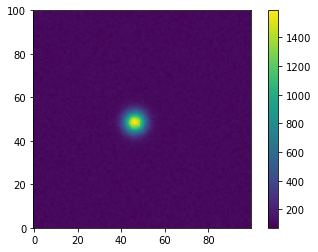

In [286]:
Q1 = ImageSimulator(student_id=studentid, assessmentQ=1, size=(100, 100))

## Answer 1:

In [287]:
from photutils import aperture_photometry
import photutils

In [288]:
def ap_phot(image, x, y, radius, skyx, skyy, skyinner, skyouter, ron, time):
    """
    Takes arguments to carry out apperture photometry calculations for a given image
    Note: if no exposure time known/provided set time argument =1
    Returns estimated flux and the associated error for the object in aperture
    """
    #Defining the object aperture
    ap = photutils.CircularAperture((x, y), radius)
    #measuring the flux in the object aperture
    fl_ap = aperture_photometry(image, ap)
    #Defining the sky aperture, if syinner=0, create a circular ap, otherwise, create an annulus
    if skyinner == 0:
        ap_sky = photutils.CircularAperture((skyx, skyy), skyouter)
    else:
        ap_sky = photutils.CircularAnnulus((skyx, skyy), skyinner, skyouter)
    #measure the flux in the sky
    fl_sky = aperture_photometry(image, ap_sky)
    #the areas of each of the apertures are
    obj_area = ap.area
    sky_area = ap_sky.area
    
    #object flux equation
    fl_object = (fl_ap['aperture_sum'][0])-((fl_sky['aperture_sum'][0]/sky_area)*obj_area)
    
    #the shot noise in the main aperture scaled with exposure time:
    shot_ap = np.sqrt(fl_ap['aperture_sum'][0]*time)
    #standard deviation of sky level
    std_sky = np.sqrt(fl_sky['aperture_sum'][0]/sky_area)
    #uncertainty in the sky level (standard error of mean)
    unc_sky = std_sky/np.sqrt(sky_area)
    #readout noise
    ron = ron
    #flux error equation
    err_obj = np.sqrt((shot_ap)**2 + (unc_sky)**2*obj_area + (ron**2)*obj_area)
    
    return fl_object, err_obj

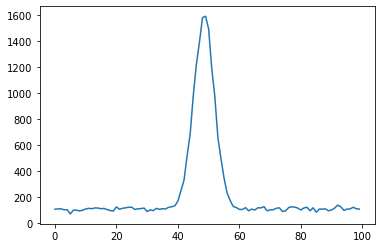

In [289]:
#cut through center of star
Q1.plot_x(46)

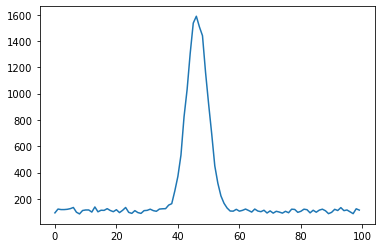

In [290]:
#cut through center of star
Q1.plot_y(49)

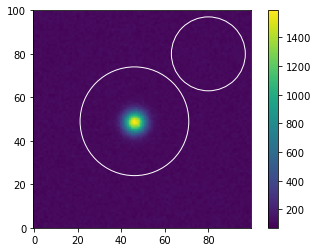

In [291]:
#plots circles to visualise aperture(s) being used on image
#sky aperture
skap = photutils.CircularAperture((80, 80), 17)
#object aperture
obap = photutils.CircularAperture((46, 49), 25)
Q1.show_ima()
skap.plot(ec='white')
obap.plot(ec='white')

In [292]:
print(ap_phot(Q1.get_data(),46,49,25,80,80,0,17,1.51,1))

(106721.58415859542, 567.7957725344869)


The flux of the star is approximately 106722 $\pm$ 566 photons (rounded to the nearest whole photons)

## Question 2

Justify the reason for choosing the aperture size and sky region that you used in Question 1. You may want to use figures to support your answer.

## Answer 2:

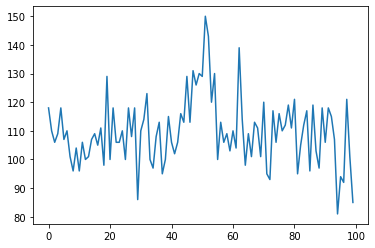

In [293]:
Q1.plot_x(56)
#cut through edge of star as suggested by cuts through center in Q1

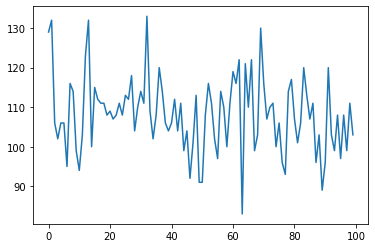

In [294]:
Q1.plot_x(71)
#new cut with radius extended brings flux down

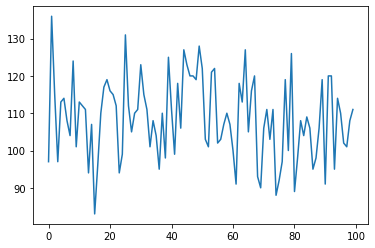

In [295]:
Q1.plot_y(59) 
#cut through edge of star as suggested by cuts through center in Q1

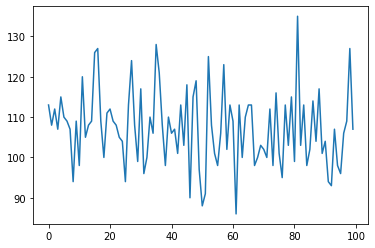

In [296]:
Q1.plot_y(74)
#new cut with radius extended brings flux down only marginally but slightly more constant 

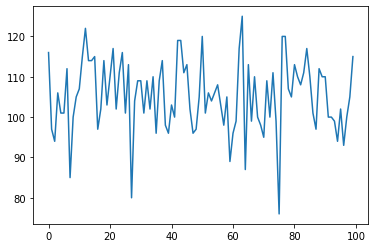

In [297]:
Q1.plot_x(80)
#cut through center of sky aperture- background even lower

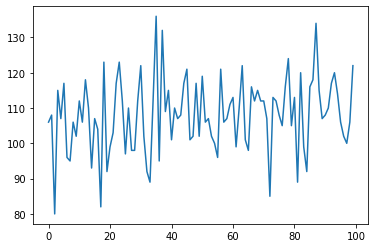

In [298]:
Q1.plot_y(80)
#cut through center of sky aperture- background even lower

From the plots in Q1 it appears that the star has a diameter of approximately 20 pixels, however when plotted there is still a small amount of noise from the edges of the star that can be further reduced. As the signal to noise ratio is high for this image, there is realtively little error in making the object aperture big to capture as much flux as possible from the star. Moving to a radius of 25 for the object aperture brings the noise down slightly to a more constant level and ensures we are capturing as much star flux as accurately as possible.

The sky aperture was chosen as far from the star source as possible (as shown in the aperture diagram in Q1) to ensure that there is minimal interferrence from the flux of the star to the background sky level. A balance needs to be chosen bewteen a small area far from the star in better 'darkness' and a large aperture, beacuse by keeping the sky aperture relatively large the uncertainty in the sky level is kept small.

## Question 3

Below, you see an image displaying a star. What are the dominant sources of uncertainty in your measurement of this star?

RON is 1.93


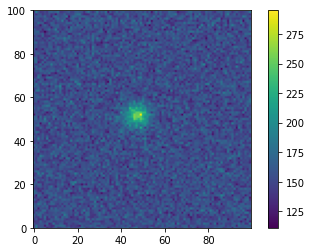

In [299]:
Q3 = ImageSimulator(student_id=studentid, assessmentQ=2, size=(100, 100))

## Answer 3:

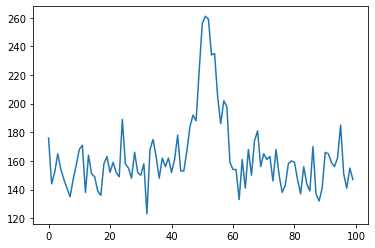

In [300]:
#cut through center of star
Q3.plot_x(46)

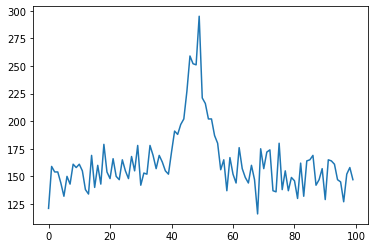

In [301]:
#cut through center of star
Q3.plot_y(52)

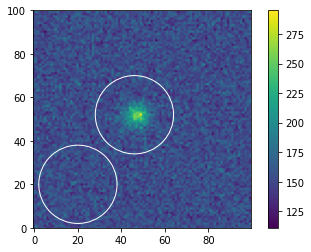

In [302]:
#plots circles to visualise aperture(s) being used on image
#sky aperture
skap = photutils.CircularAperture((20, 20), 18) 
#object aperture
obap = photutils.CircularAperture((46, 52), 18) 
Q3.show_ima()
skap.plot(ec='white')
obap.plot(ec='white')

Noisier so not as big an object aperture as Q1 even with similar star diameters, but keeping sky ap relatively large to get better sky average and lower sky uncertainty.

In [303]:
ap_phot(Q3.get_data(),46,52,18,20,20,0,18,1.93,1)

(8066.263112859189, 411.4747570456154)

The signal to noise ratio in this image is low so the dominant source of uncertainty is likely due to the shot noise. Shot noise is due to the Poisson noise within the aperture from both the sky and source.

## Question 4: 

Below is a crowded field. If you perform aperture photometry on Star 1, is the flux of star 1 likely to be:

a) measured correctly

b) overestimated or

c) underestimated?

Explain your reasoning, justifying your response with some qualtitive arguments.

RON is 4.02


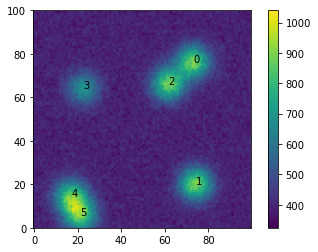

In [304]:
Q4 = ImageSimulator(student_id=studentid, assessmentQ=4, size=(100, 100))

## Answer 4:

The flux of star 1 will likely be a)measured correctly because it is isolated in the field and has a distinct peak unlike stars 4 & 5 as well as 2 & 0 which seem to overlap and would likely be overestimated. Star 3 on the other hand is quite faint compared to the other stars and so may be underestimated. These two things can be seen from the first cut through x=20 where the left hand peak is a micture of flux from stars 4 & 5 and the much less prominent peak on the right is star 3.

The other two cuts are through star 1 showing that it is far enough from other stars to determine a radius and that the intensity is large enough to not be as significantly affected by noise.

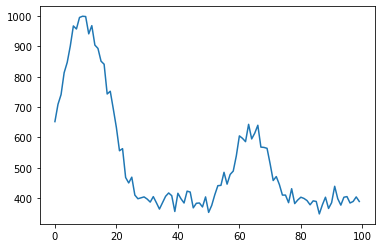

In [305]:
Q4.plot_x(20)
#cut showing star 4/5 and 3

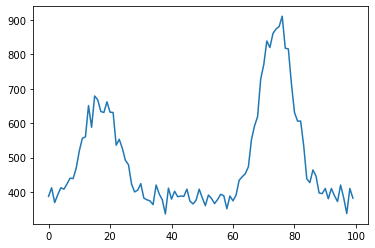

In [306]:
Q4.plot_y(20)
#cut showing star 4 and 1

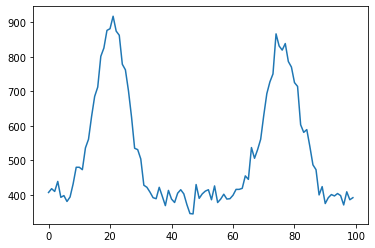

In [307]:
Q4.plot_x(75)
#cut showing star 1 and 0 

## Question 5

The star indicated in the center of image Q5 (Star 1) has an apparent r-band magnitude of r=19.37 +/- 0.04 mag.

Given this information, what is the image zeropoint? Show and document your full working.

RON is 3.91


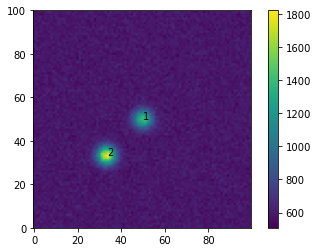

In [308]:
Q5 = ImageSimulator(student_id=studentid, assessmentQ=5, size=(100, 100))

## Answer 5:

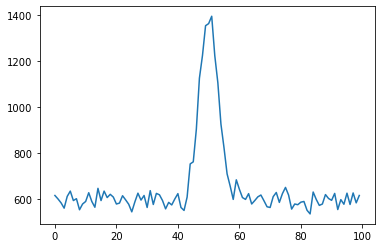

In [309]:
#cut through center of standard star 1
Q5.plot_x(50)

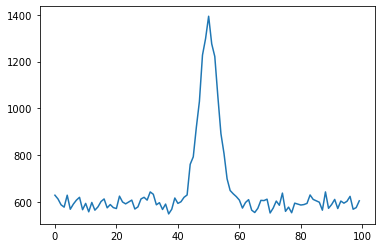

In [310]:
#cut through center of standard star 1
Q5.plot_y(51)

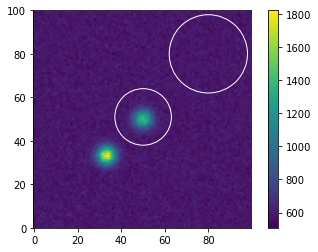

In [311]:
#plots circles to visualise aperture(s) being used on image
#sky aperture
skap = photutils.CircularAperture((80, 80), 18) 
#object aperture
obap = photutils.CircularAperture((50, 51), 13) 
Q5.show_ima()
skap.plot(ec='white')
obap.plot(ec='white')

In [312]:
#determine flux of star 1
ap_phot(Q5.get_data(),50,51,13,80,80,0,18,3.91,1)

(48430.16498131375, 608.4930629447593)

The equation to determine zero point is  $Mag = zeropoint - 2.5\log{Flux}$ so rearranging for zeropoint gives:

In [313]:
#define variables and associated errors
mag = 19.37
err_mag = 0.04
flux= 48430.16498131375
err_flux= 608.4930629447593

#calculate zeropoint
zeropoint = mag + 2.5*np.log10(flux)
err_zeropoint = np.sqrt((err_mag/mag)**2 + (err_flux/(flux*np.log(10))**2))*zeropoint

print("zeropoint is %3g +/- %.3g" % (zeropoint, err_zeropoint))

zeropoint is 31.0828 +/- 0.0646


## Question 6

Use the zeropoint that you derived in Question 5 to determine the apparent magnitude of the second star (Star 2) in the image above. Provide the associated statistical and systematic magnitude uncertainty in your answer.

## Answer 6:

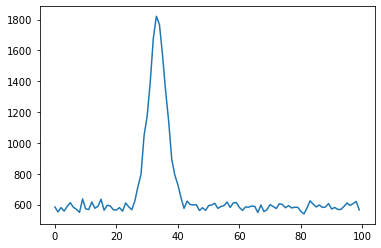

In [314]:
#cut through center of star 2
Q5.plot_x(34)

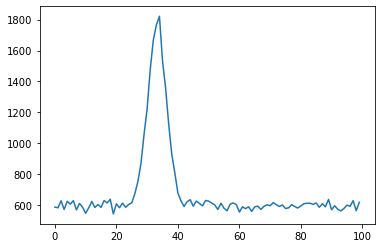

In [315]:
#cut through center of star 2
Q5.plot_y(33)

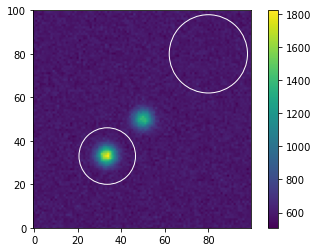

In [316]:
#plots circles to visualise aperture(s) being used on image
#sky aperture
skap = photutils.CircularAperture((80, 80), 18) 
#object aperture - keep same size as in Q5 so zeropoint is same/no aperture corrrection needed
obap = photutils.CircularAperture((33.5, 33), 13) 
Q5.show_ima()
skap.plot(ec='white')
obap.plot(ec='white')

In [317]:
#determine flux of star 2
ap_phot(Q5.get_data(),33.5,33,12,80,80,0,18,3.91,1)

(66449.36314036616, 583.6732637260952)

In [318]:
#defining variables for flux and error of star 2
flux2 = 66449.36314036616
err_flux2 = 583.6732637260952

#calculate apparent mag of star 2
appmag = zeropoint - 2.5*np.log10(flux2)
err_appmag = np.sqrt((err_flux2/(np.log(10)*flux2))**2 + (err_zeropoint/zeropoint**2))*appmag
print("apparent magnitude of star 2 is %3g +/- %.3g (statistical uncertainty)" % (appmag, err_appmag))

apparent magnitude of star 2 is 19.0266 +/- 0.172 (statistical uncertainty)


The systematic uncertainty of the flux measurement is due to the uncertainty of the zeropoint which was calculated and originates from the uncertainty in the standard star (star 1) used from Q5. The uncertainty of the standard star was $\pm$0.04 which when propagated through to an uncertainty in zeropoint, the systematic uncertainty becomes: $\pm$0.0646

## Question 7

How would the zeropoint that you measured above change if the observations were taken in better observing conditions (e.g. less air turbulance, few clouds or cirrus) ?

## Answer 7:

The zeropoint would be lower if the observations were taken in better observing conditions beacuse there would be less attenuation and so apparent magnitude must be brighter with greater flux. A brighter star corresponds to a lower magnitude so the closer the zeropoint is to zero, the closer apparent magnitude gets to absolute magnitude.

## Question 8

The apparent magnitude of all sources in the image below is known to an accuracy of $\pm$10\% from previous surveys. Which of the numbered sources in the image would be appropriate, and conversely, inappropriate for deriving the image zeropoint? Provide reasons for your response.

RON is 2.67


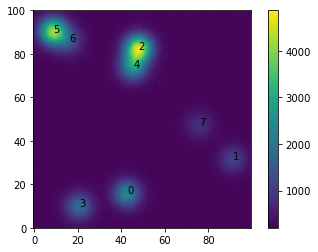

In [319]:
Q8 = ImageSimulator(student_id=studentid, assessmentQ=8, size=(100, 100))

## Answer 8:

Stars 5&6 and 2&4 would be innappropriate to use for deriving the zeropoint beacuse they are too close together that their fluxes would interfere with each other when trying to take a measurement. This would result in innacurate fluxes that are too large. Conversely, stars 7 and 1 are very faint meaning that sky error would dominate and flux may be underestimated, so they would not be ideal for calculating the zeropoint either. Between stars 0 and 3, star 0 appears to be the best candidate to use for determining the zeropoint because it is the brighter of the two and lies slightly further from the x-axis of the image so that a suitably sized circular aperture can be used around it. Star 3 is a bit too close to the edge of the image that some of the flux from the star may be lost at the sides (an argument which also applies to rejecting stars 1 and 5) however it is still the second best candidate.

## Question 9

Which of the science objectives listed below require absolute flux calibration, and which are achievable with relative flux calibration?

a) Detection of an exoplanet using the transit method.

b) The absolute magnitude of the host of an exoplanet.

c) The temperature of the host star.

Provide your reasoning in your answers.

## Answer 9:

a) Detection of an exoplanet using the transit method only needs relative flux calibration becasue the light levels of the star are normalised anyway. To detect the exoplanet and derive properties one only needs to observe the realtive change in flux.

b)The absolute magnitude of the host of an exoplanet would require absolute flux calibration beacuse this is the true value of magnitude we are trying to determine for a star and cannot be done relatively as it is a property of the star itself.

c)The temperature of the host star would also require absolute flux calibration since temperature is again a property of the star itself which is dependant on flux/luminosity and it is not a relative change one is measuring.

## Question 10

The two images below (Q10a, Q10b) show a star targeted for an exoplanet transit in the centre of the image. The second star is the standard star with constant flux. Which of the two images shows the planet in transit, and what's the observed fractional drop in the eclipsed star's flux?

RON is 2.50


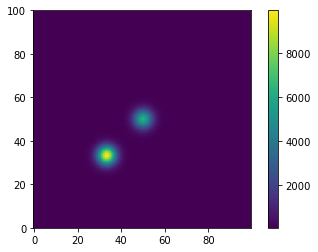

In [320]:
Q10a = ImageSimulator(student_id=studentid, assessmentQ=101, size=(100, 100))

RON is 2.50


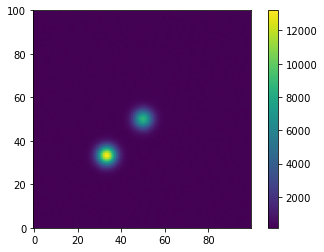

In [321]:
Q10b = ImageSimulator(student_id=studentid, assessmentQ=102, size=(100, 100))

## Answer 10:

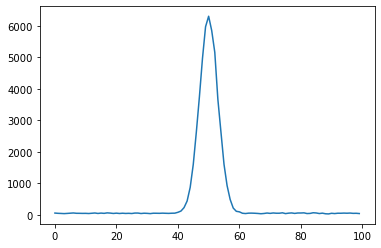

In [322]:
#cut through transit star
Q10a.plot_x(50)

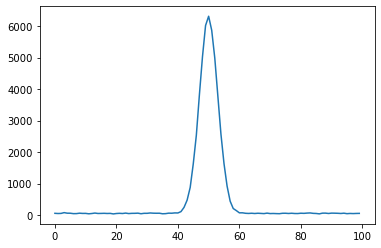

In [323]:
#cut through transit star
Q10a.plot_y(50)

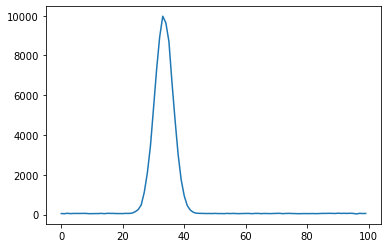

In [324]:
#cut through constant star
Q10a.plot_x(33)

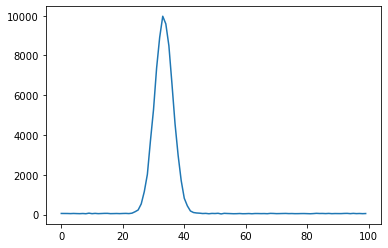

In [325]:
#cut through constant star
Q10a.plot_y(33)

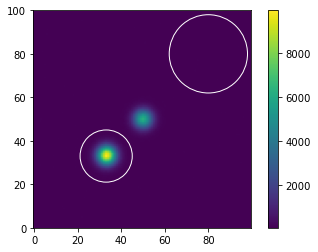

In [326]:
#plots circles to visualise aperture(s) being used on image
#sky aperture
skap = photutils.CircularAperture((80, 80), 18) 
#object aperture -keep same size so can normalise to standard star
obap = photutils.CircularAperture((33, 33), 12) 
Q10a.show_ima()
skap.plot(ec='white')
obap.plot(ec='white')

In [327]:
#flux for a
ap_phot(Q10a.get_data(),50,50,12,80,80,0,18,2.50,1)

(350069.295665534, 614.0337843642415)

In [328]:
#flux for b
ap_phot(Q10b.get_data(),50,50,12,80,80,0,18,2.50,1)

(481914.5131101564, 759.0751356175786)

In [329]:
#flux const star in a
ap_phot(Q10a.get_data(),33,33,12,80,80,0,18,2.50,1)

(558396.593938933, 765.0913583449175)

In [330]:
#flux const star in b
ap_phot(Q10b.get_data(),33,33,12,80,80,0,18,2.50,1)

(740871.7433427628, 913.8666706612358)

In [331]:
#normalise to star a
const_a = 558396.593938933
err_ca =  765.0913583449175
flux_a = 350069.295665534
err_a = 614.0337843642415

const_b = 740871.7433427628
err_cb = 913.8666706612358
#subtract same amount it takes to get from constant star b to constant star a as normalising to a
flux_b = 481914.5131101564 -(const_b - const_a)
err_b = 759.0751356175786
err_totb= np.sqrt(err_b**2+ err_ca**2 + err_cb**2)

print(flux_b)

299439.3637063266


In [332]:
#flux a is greater so take star a as star w/out transit
drop = (flux_a-flux_b)/flux_a
err_drop = np.sqrt((np.sqrt(err_a**2+err_totb**2)/(flux_a-flux_b))**2 + (err_a/flux_a)**2)*drop

print("Star 'b' has the lower flux so this is the image in which a transit is occuring.")
print("The fractional flux drop due to the exoplanet is %3g +/- %.3g" % (drop, err_drop))

Star 'b' has the lower flux so this is the image in which a transit is occuring.
The fractional flux drop due to the exoplanet is 0.144628 +/- 0.00441


## Question 11

What possible reasons are there for the change in flux in the constant source in the two images above?

## Answer 11:

Reasons for the change in flux of the constant source could be due to the weather conditions during the two different times of observation, for example increased cloud cover and/or air turbulance. This would change the amount of attenuation of the star's flux.